In [1]:
from google.colab import files
uploaded = files.upload()

Saving clean_matches_stats_only.csv to clean_matches_stats_only.csv


# Exploratory Data Analysis (EDA)

## Objective

The goal of this section is to explore patterns related to the home advantage in football using visual analysis. This step is essential for building an initial understanding of the dataset before conducting formal hypothesis testing.

## Purpose

EDA helps to:
- Identify general trends and distributions in match outcomes and performance metrics.
- Visually support or challenge the hypotheses defined in the project.
- Reveal potential anomalies, missing values, or variable relationships that require attention.

## Structure of this EDA

The following visual analyses are conducted:

1. **Match Outcome Distribution**  
   Visual comparison of home wins, draws, and away wins (related to Hypothesis 1).

2. **Goal Distribution (Home vs Away)**  
   Histogram of goals scored by home and away teams to examine scoring patterns (supports Hypothesis 2).

3. **Home Win Rate by League**  
   Bar chart of how often home teams win in each league (related to Hypothesis 4).

4. **Ball Possession Distribution**  
   Density plot comparing possession rates of home and away teams (supports Hypothesis 3).

5. **Correlation Heatmap**  
   Matrix of statistical correlations between key variables like goals, possession, and pass accuracy (supports Hypotheses 2 & 3).

Each visualization is followed by a brief interpretation in the notebook to connect the plot with the relevant hypothesis.

---


In [5]:
# Step 1: Setup and Data Preparation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Load dataset
df = pd.read_csv('clean_matches_stats_only.csv')

# Create derived columns
df['outcome'] = df.apply(lambda row: 'Home Win' if row['home_goals'] > row['away_goals']
                         else 'Away Win' if row['home_goals'] < row['away_goals']
                         else 'Draw', axis=1)
df['goal_diff'] = df['home_goals'] - df['away_goals']

# Convert percentage strings to numeric
percentage_columns = ['home_possession', 'away_possession',
                      'home_pass_accuracy', 'away_pass_accuracy']
for col in percentage_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')


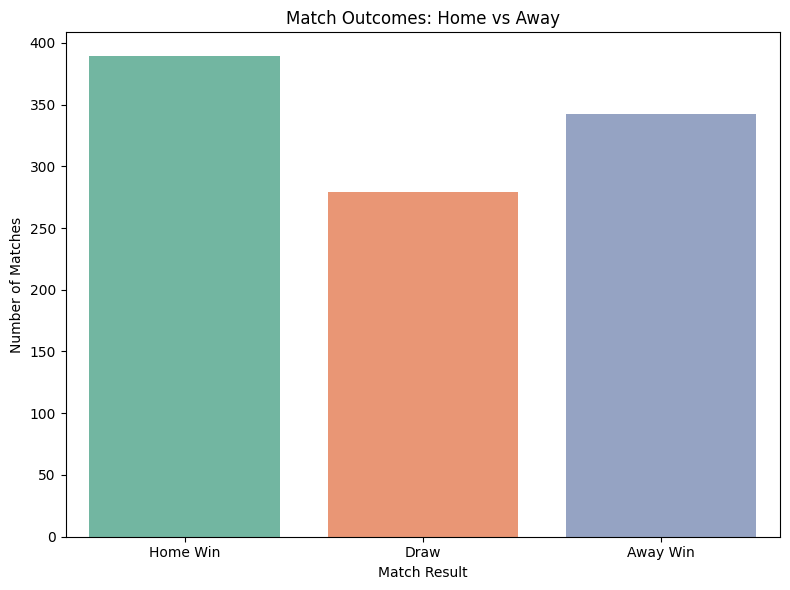

In [6]:
# Step 2: Match Outcome Distribution (Related to Hypothesis 1)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='outcome', order=['Home Win', 'Draw', 'Away Win'], palette='Set2')
plt.title('Match Outcomes: Home vs Away')
plt.xlabel('Match Result')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()


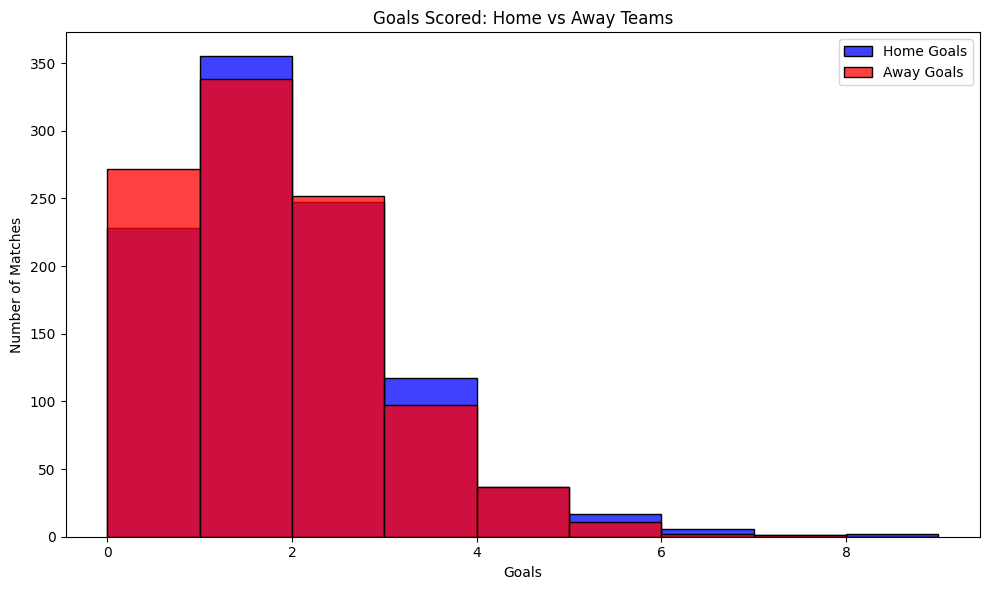

In [7]:
# Step 3: Goal Distribution Comparison (Related to Hypothesis 2)

plt.figure(figsize=(10, 6))
sns.histplot(df['home_goals'], bins=range(0, 10), color='blue', label='Home Goals', kde=False)
sns.histplot(df['away_goals'], bins=range(0, 10), color='red', label='Away Goals', kde=False)
plt.legend()
plt.title('Goals Scored: Home vs Away Teams')
plt.xlabel('Goals')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()


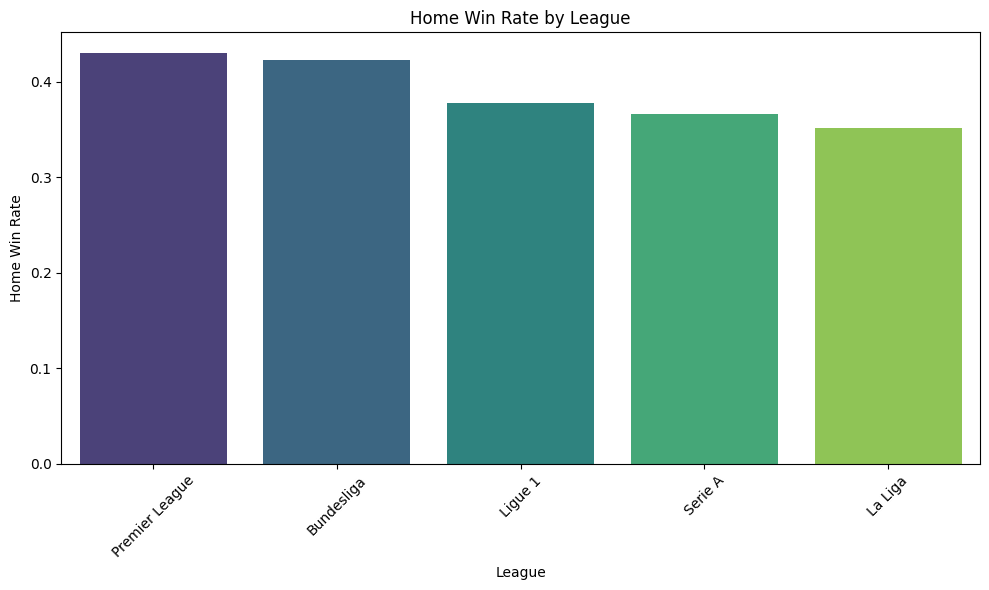

In [8]:
# Step 4: Home Win Rate by League (Related to Hypothesis 4)

league_win_rate = df[df['outcome'] == 'Home Win'].groupby('league').size() / df.groupby('league').size()
league_win_rate = league_win_rate.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=league_win_rate.index, y=league_win_rate.values, palette='viridis')
plt.title('Home Win Rate by League')
plt.xlabel('League')
plt.ylabel('Home Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


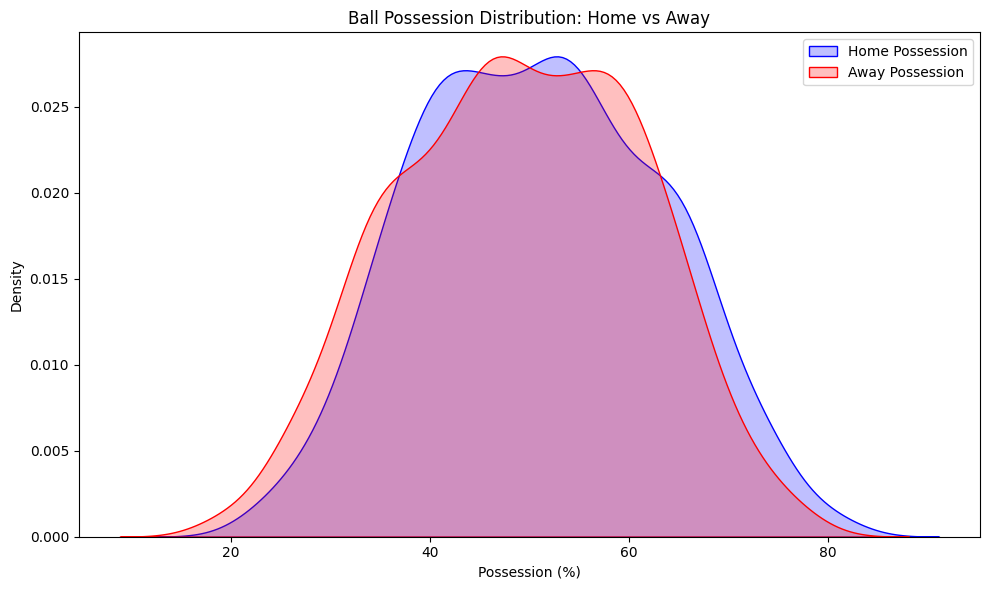

In [9]:
# Step 5: Ball Possession Distribution (Related to Hypothesis 3)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['home_possession'], fill=True, label='Home Possession', color='blue')
sns.kdeplot(df['away_possession'], fill=True, label='Away Possession', color='red')
plt.title('Ball Possession Distribution: Home vs Away')
plt.xlabel('Possession (%)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


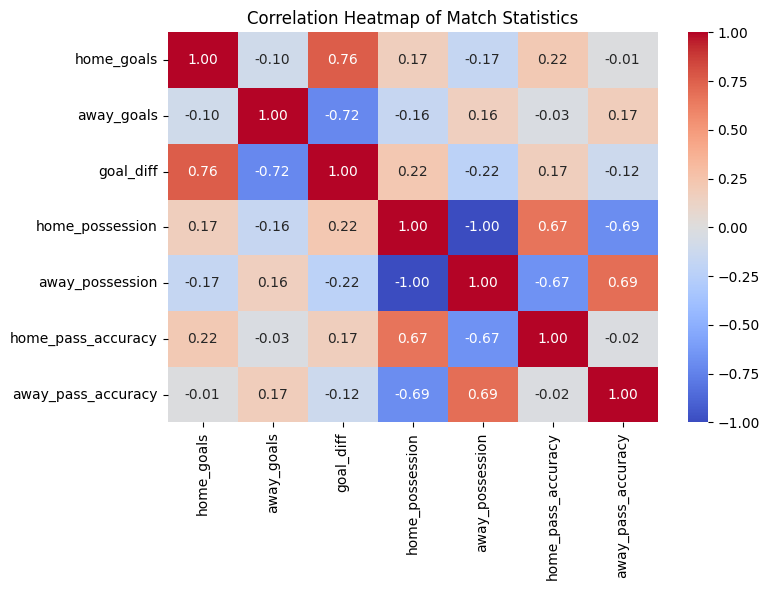

In [10]:
# Step 6: Correlation Heatmap of Key Match Statistics

numerical_columns = [
    'home_goals', 'away_goals', 'goal_diff',
    'home_possession', 'away_possession',
    'home_pass_accuracy', 'away_pass_accuracy'
]

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Match Statistics')
plt.tight_layout()
plt.show()
